<a id='start'></a>

# Solar Orbiter 8 Data Workshop Data Analysis Tutorial -- RPW TDS Data analysis

This notebook presents how to display Type III Solar Radio burst Langmuir Waves visible on RPW TDS triggered snapshots waveforms (TSWF).

More examples can be found in https://rpw.lesia.obspm.fr/rpw-data/data-reading

IMPORTANT: Before starting the tutorial, make sure to have the following RPW data file available in the /Data folder (see get_rpw_data notebook for more details to downlink RPW data files):
* solo_L2_rpw-tds-suv-tswf-e_20211009_V??.cdf

In [1]:
#%matplotlib inline
#%matplotlib notebook
# Imports

from pathlib import Path
import cdflib.epochs as epoch

import tds_helpers as helper # contains functions for this notebook


# TDS DATA USE CASES

## 1. Load RPW TDS RSWF L2 cdf file (required for the next use cases)

In [2]:
"""
    Loading input TDS files
"""

# Define date of data
date = '20211009'

# Get filepath
filedir = Path.cwd() / "Data"
filepath = list(filedir.glob("solo_L2_rpw-tds-surv-tswf-e_{0}_V??.cdf".format(date)))
if len(filepath) == 0:
    print(f'ERROR - No solo_L2_rpw-tnr-surv_20211009 CDF file found in /Data, please check !'.format(date))
else:
    filepath = filepath[0]

# Load RPW TDS TSWF data from L2 CDF files
try:
    tswf = helper.load_tswf(str(filepath))
except:
    print('ERROR - Cannot load {0}!'.format(filepath))
else:
    print('{0} loaded'.format(filepath))


loading /Users/xbonnin/Work/Projects/SolarOrbiter/RPW/ROC/Software/Git/Tutorials/RPW_tutorial/Data/solo_L2_rpw-tds-surv-tswf-e_20211009_V01.cdf
/Users/xbonnin/Work/Projects/SolarOrbiter/RPW/ROC/Software/Git/Tutorials/RPW_tutorial/Data/solo_L2_rpw-tds-surv-tswf-e_20211009_V01.cdf loaded


## 2. Plot waveform

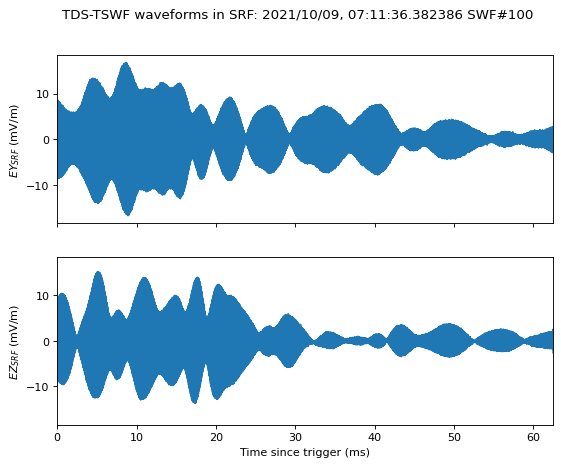

In [3]:
# Waveform plot
"""
    Plot TDS-TSWF waveform snapshot
"""
rec = 100 # snapshot #101

ww = helper.convert_to_SRF(tswf, rec)
t0 = epoch.CDFepoch.to_datetime(tswf['Epoch'][rec])[0]
sr = tswf['SAMPLING_RATE'][rec]

helper.plot_waveform(ww, t0, sr, rec)

## 3. Plot spectrum

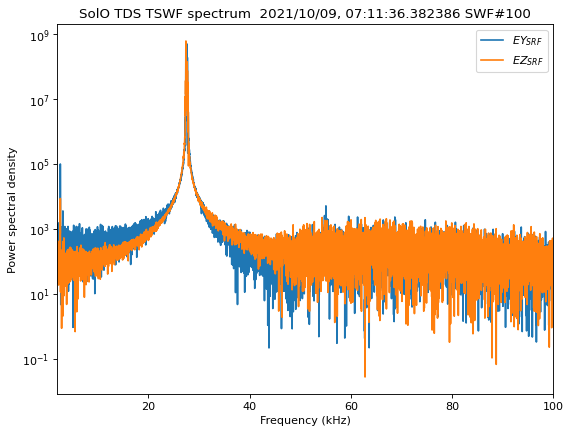

In [4]:
# Spectrum plot
"""
    Plot TDS-TSWF spectrum computed from Ey and Ez SRF
"""
rec = 100 # snapshot #101

# Convert snapshot #101 to SRF
ww = helper.convert_to_SRF(tswf, rec)

t0 = epoch.CDFepoch.to_datetime(tswf['Epoch'][rec])[0]
sr = tswf['SAMPLING_RATE'][rec]

helper.plot_spectrum(ww, t0, sr, rec)

## 4. Plot hodogram


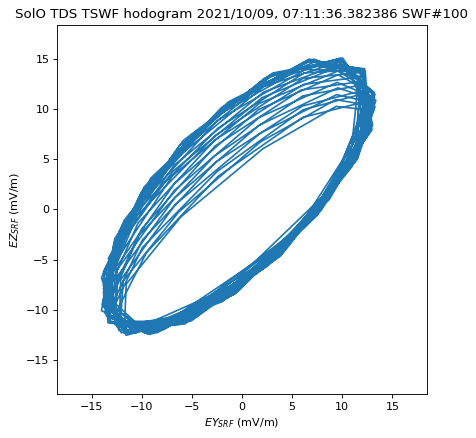

In [5]:
# Hodogram plot
"""
    Plot TDS-TSWF hodogram from Ey-Ez component
"""
rec = 100 # snapshot #101
ww = helper.convert_to_SRF(tswf, rec)
t0 = epoch.CDFepoch.to_datetime(tswf['Epoch'][rec])[0]
sr = tswf['SAMPLING_RATE'][rec]

helper.plot_hodogram(ww, t0, rec) # snapshot 101, length = 200 (default), center chosen at maximum

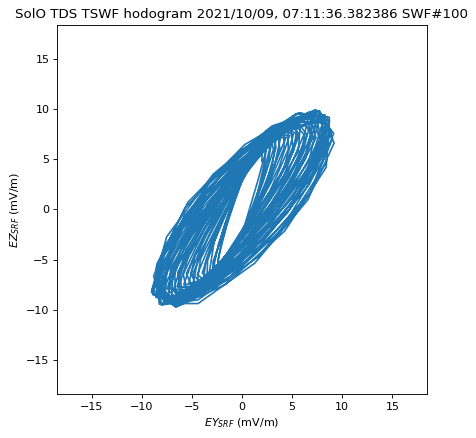

In [6]:
# Manual Hodogram plot
"""
    Plot TDS-TSWF snapshot
"""
rec = 100 # snapshot #101
ww = helper.convert_to_SRF(tswf, rec)
t0 = epoch.CDFepoch.to_datetime(tswf['Epoch'][rec])[0]
sr = tswf['SAMPLING_RATE'][rec]

helper.plot_hodogram(ww, t0, rec, 300, 6000) # snapshot 100, length 300, center 6000